### Exploratory Data Analysis for SE3 region for year 2000.

In [1]:
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn import preprocessing as prep
from scipy.stats import pearsonr

In [2]:
reduced_data = pd.read_csv('two_years_merged_and_reduced.csv')
reduced_data.time = pd.to_datetime(reduced_data.time)
#convert 'time' column to index
reduced_data = reduced_data.set_index('time')
reduced_data = reduced_data.rename(columns= {'power-production' : 'PowerProduction'},)

In [3]:
#SE3
df_SE3 = reduced_data[reduced_data.region == 'SE3']
df_SE3 = df_SE3.drop(labels=['region', 'cluster', 'distance'], axis=1)

`Note: In this notebook I have resampled at different rates and I have normalised the resampled data each time`

In [4]:
#reduced_data

#resampled to aggregate the hourly data into monthly data
df_SE3_sampled_M = df_SE3.resample('M').mean()
#reduced_data.head()
df_SE3_sampled_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2000-01-31 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Freq: M
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       24 non-null     float64
 1   RelativeHumidity  24 non-null     float64
 2   Wind_U            24 non-null     float64
 3   Wind_V            24 non-null     float64
 4   Pressure          24 non-null     float64
 5   CloudCover        24 non-null     float64
 6   WindGustSpeed     24 non-null     float64
 7   PowerProduction   24 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [5]:
df_SE3_sampled_M.isnull().values.sum()

0

In [6]:
scaler = prep.MinMaxScaler()
df_SE3_normalized_M = df_SE3_sampled_M.copy()
df_SE3_normalized_M[df_SE3_normalized_M.columns] = scaler.fit_transform(df_SE3_normalized_M[df_SE3_normalized_M.columns])

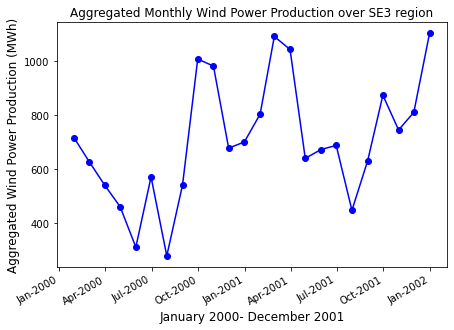

In [7]:
plt.figure(figsize=(7,5))
plt.plot(df_SE3_sampled_M.PowerProduction, 'b', marker='o')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Aggregated Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000- December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Aggregated Monthly Wind Power Production over SE3 region')
plt.savefig("Aggregated_Wind_Power_M_SE3.png", transparent=True)

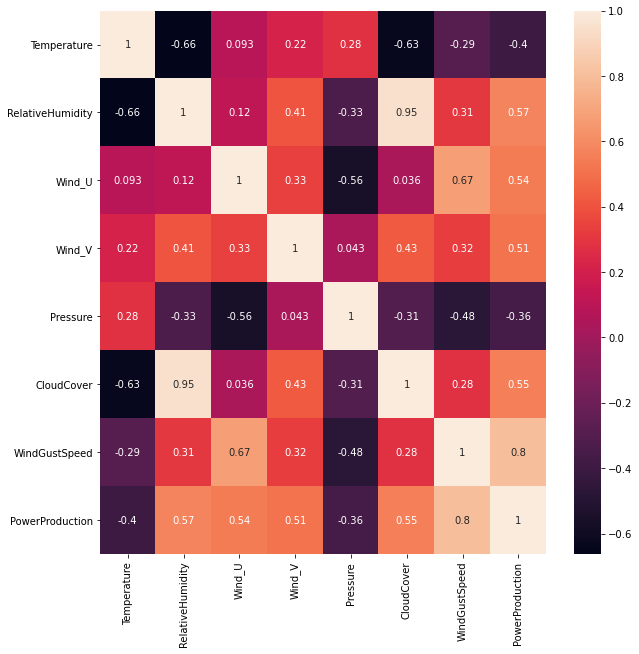

In [8]:
import seaborn as sns
df_small = df_SE3_normalized_M.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [9]:
df_2000_SE3_M = df_SE3_normalized_M.loc['2000-01-31': '2000-12-31']

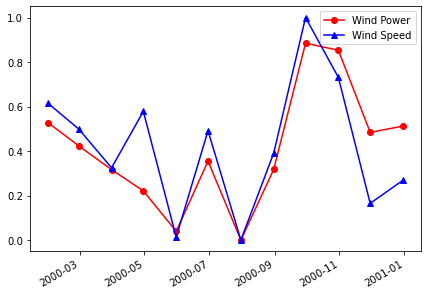

In [10]:
#wind power vs wind speed of each month of 2000 year
plt.figure(figsize=(7,5))
plt.plot(df_2000_SE3_M.PowerProduction, 'r', marker='o')
plt.plot(df_2000_SE3_M.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])

###### We can see that from April to May, wind power has further reduced, however wind speed has increased from April to May. After that, over the year as the wind speed changes wind power changes. It seems it is wind speed and power production is well coorelated.

0.8017309795938409


Text(0, 0.5, 'Wind Power Production')

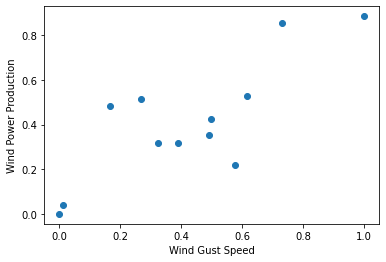

In [11]:
#correlation speed and power production of each month of 2000 year
corr_speed_power, _ = pearsonr(df_2000_SE3_M.WindGustSpeed, df_2000_SE3_M.PowerProduction)
print(corr_speed_power)
plt.scatter(df_2000_SE3_M.WindGustSpeed, df_2000_SE3_M.PowerProduction )
plt.xlabel("Wind Gust Speed")
plt.ylabel("Wind Power Production")

0.5367096482551311


Text(0, 0.5, 'Wind Power Production')

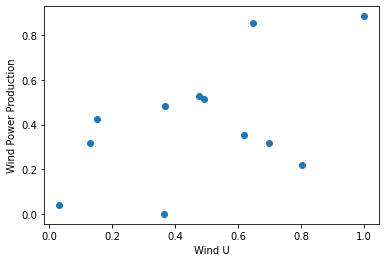

In [12]:
#correlation wind speed U component and power production of each month of 2000 year
corr_speed_power, _ = pearsonr(df_2000_SE3_M.Wind_U, df_2000_SE3_M.PowerProduction)
print(corr_speed_power)
plt.scatter(df_2000_SE3_M.Wind_U, df_2000_SE3_M.PowerProduction )
plt.xlabel("Wind U")
plt.ylabel("Wind Power Production")

0.5442251621094497


Text(0, 0.5, 'Wind Power Production')

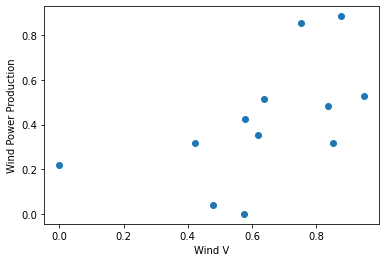

In [13]:
#correlation wind speed V component and power production of each month of 2000 year
corr_speed_power, _ = pearsonr(df_2000_SE3_M.Wind_V, df_2000_SE3_M.PowerProduction)
print(corr_speed_power)
plt.scatter(df_2000_SE3_M.Wind_V, df_2000_SE3_M.PowerProduction )
plt.xlabel("Wind V")
plt.ylabel("Wind Power Production")

In [14]:
df_2000_SE3_M['PowerProduction'].idxmax()

Timestamp('2000-09-30 00:00:00+0000', tz='UTC', freq='M')

In [15]:
df_2000_SE3_M['WindGustSpeed'].idxmax()

Timestamp('2000-09-30 00:00:00+0000', tz='UTC', freq='M')

###### Maximum wind power production observed in september month of 2000 year.

In [16]:
df_2000_SE3_M['PowerProduction'].idxmin()

Timestamp('2000-07-31 00:00:00+0000', tz='UTC', freq='M')

In [17]:
df_2000_SE3_M['WindGustSpeed'].idxmin()

Timestamp('2000-07-31 00:00:00+0000', tz='UTC', freq='M')

###### Minimum wind power production observed in july month of 2000 year.

In [18]:
#resampled to aggregate the hourly data into single day for all days
df_SE3_sampled_D = df_SE3.resample('D').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE3_sampled_D = df_SE3_sampled_D.dropna()
df_SE3_sampled_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2000-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       668 non-null    float64
 1   RelativeHumidity  668 non-null    float64
 2   Wind_U            668 non-null    float64
 3   Wind_V            668 non-null    float64
 4   Pressure          668 non-null    float64
 5   CloudCover        668 non-null    float64
 6   WindGustSpeed     668 non-null    float64
 7   PowerProduction   668 non-null    float64
dtypes: float64(8)
memory usage: 47.0 KB


In [19]:
scaler = prep.MinMaxScaler()
df_SE3_normalized_D = df_SE3_sampled_D.copy()
df_SE3_normalized_D[df_SE3_normalized_D.columns] = scaler.fit_transform(df_SE3_normalized_D[df_SE3_normalized_D.columns])

In [20]:
df_SE3_normalized_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2000-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       668 non-null    float64
 1   RelativeHumidity  668 non-null    float64
 2   Wind_U            668 non-null    float64
 3   Wind_V            668 non-null    float64
 4   Pressure          668 non-null    float64
 5   CloudCover        668 non-null    float64
 6   WindGustSpeed     668 non-null    float64
 7   PowerProduction   668 non-null    float64
dtypes: float64(8)
memory usage: 47.0 KB


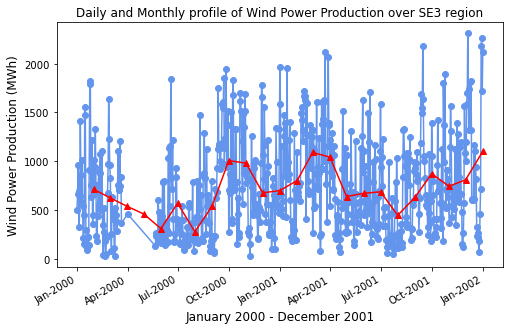

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df_SE3_sampled_D.PowerProduction, 'cornflowerblue', marker='o')
plt.plot(df_SE3_sampled_M.PowerProduction, 'r', marker='^')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000 - December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Daily and Monthly profile of Wind Power Production over SE3 region")
plt.savefig("Aggregated_Wind_Power_D_M_SE3.png", transparent=True)

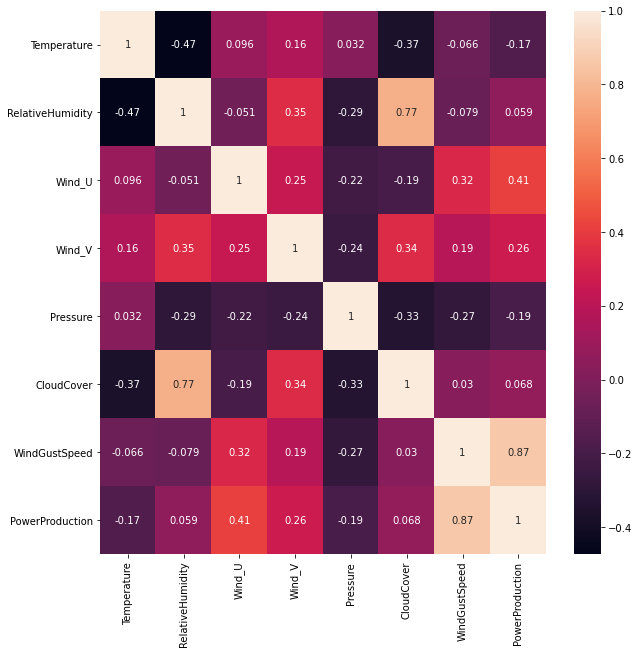

In [22]:
import seaborn as sns
df_small = df_SE3_normalized_D.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [23]:
df_2000_se3 = df_SE3_normalized_D.loc['2000-01-01': '2000-12-31']

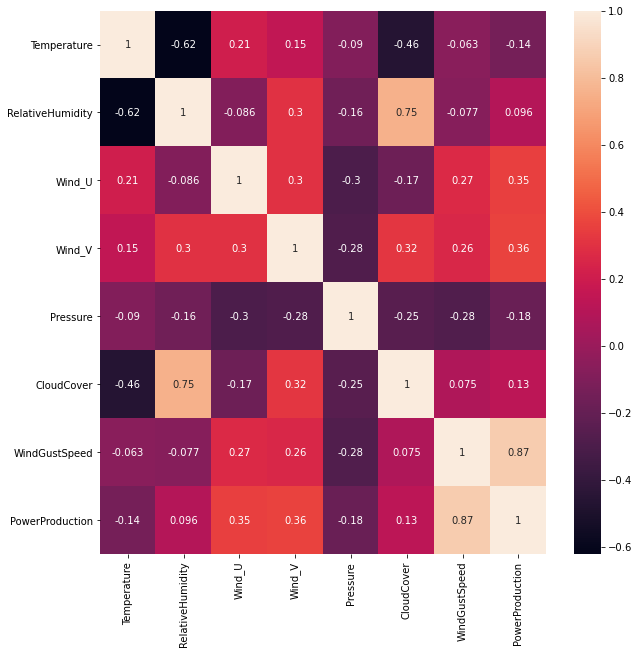

In [24]:
import seaborn as sns
df_small = df_2000_se3.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

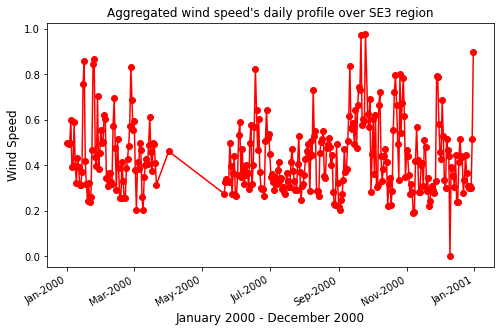

In [25]:
plt.figure(figsize=(8,5))
plt.plot(df_2000_se3.WindGustSpeed, 'r', marker='o')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Wind Speed', fontsize=12)
plt.xlabel('January 2000 - December 2000', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Aggregated wind speed's daily profile over SE3 region")
plt.savefig("Aggregated_Wind_Speed_D_SE3.png", transparent=True)

In [26]:
df_May2000_SE3_D = df_SE3_normalized_D.loc['2000-05-01': '2000-05-31']

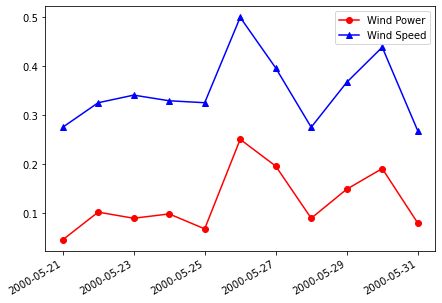

In [27]:
#wind power vs wind speed for May month
plt.figure(figsize=(7,5))
plt.plot(df_May2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_May2000_SE3_D.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])

###### 23rd and 24th May: slight increase in wind speed but wind power reduces and on 24th wind speed reduces but wind power increases. But after this wind power changes with wind speed.

In [28]:
# we observed maximum power production and wind speed in september month 
df_Sep_2000_SE3_D = df_SE3_normalized_D.loc['2000-09-01': '2000-09-30']

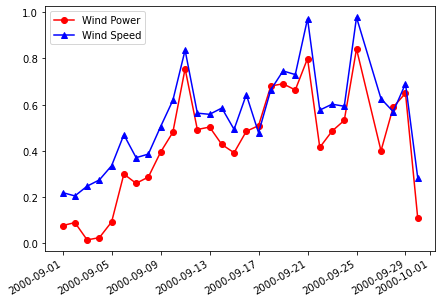

In [29]:
#wind power production vs wind speed in Septempber, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_Sep_2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_Sep_2000_SE3_D.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])

0.9535304220015031


Text(0, 0.5, 'Wind Power Production')

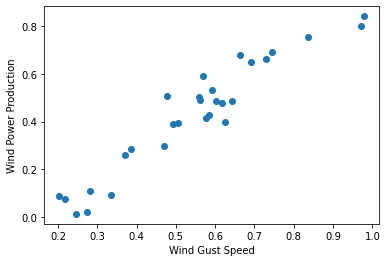

In [30]:
#correlation wind speed and power production in Septempber, 2000.
corr_speed_power, _ = pearsonr(df_Sep_2000_SE3_D.WindGustSpeed, df_Sep_2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_Sep_2000_SE3_D.WindGustSpeed, df_Sep_2000_SE3_D.PowerProduction )
plt.xlabel("Wind Gust Speed")
plt.ylabel("Wind Power Production")

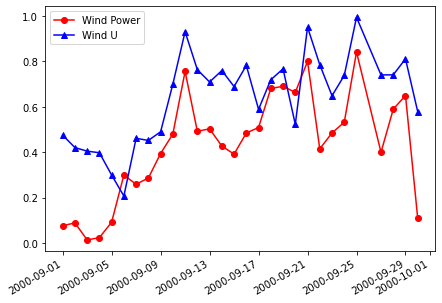

In [31]:
#wind power production vs wind U component in Septempber, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_Sep_2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_Sep_2000_SE3_D.Wind_U, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind U'])

0.801384564725261


Text(0, 0.5, 'Wind Power Production')

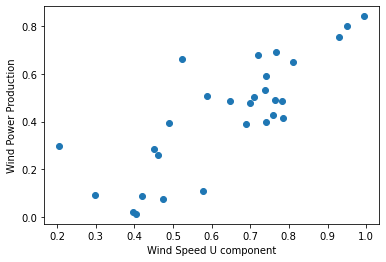

In [32]:
#correlation of wind U component and power production in Septempber, 2000.
corr_speed_power, _ = pearsonr(df_Sep_2000_SE3_D.Wind_U, df_Sep_2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_Sep_2000_SE3_D.Wind_U, df_Sep_2000_SE3_D.PowerProduction )
plt.xlabel("Wind Speed U component")
plt.ylabel("Wind Power Production")

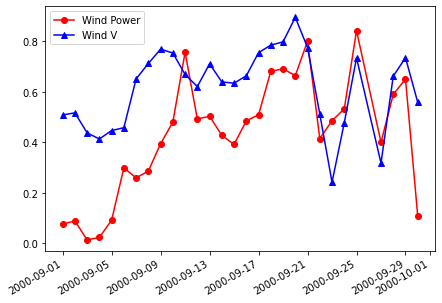

In [33]:
#wind power production vs wind speed V component in Septempber, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_Sep_2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_Sep_2000_SE3_D.Wind_V, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind V'])

0.5897416968504462


Text(0, 0.5, 'Wind Power Production')

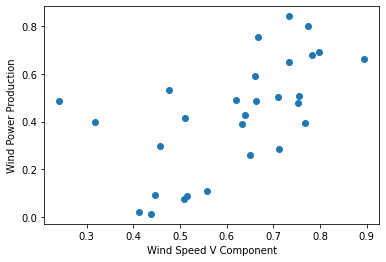

In [34]:
#correlation of wind speed V component and power production in Septempber, 2000.
corr_speed_power, _ = pearsonr(df_Sep_2000_SE3_D.Wind_V, df_Sep_2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_Sep_2000_SE3_D.Wind_V, df_Sep_2000_SE3_D.PowerProduction )
plt.xlabel("Wind Speed V Component")
plt.ylabel("Wind Power Production")

In [35]:
#we observed minimum in July
df_July2000_SE3_D = df_SE3_normalized_D.loc['2000-07-01': '2000-07-31']

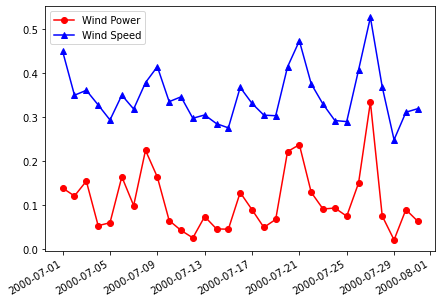

In [36]:
#wind power production vs wind speed in Septempber, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_July2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_July2000_SE3_D.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])

0.8759673274158303


Text(0, 0.5, 'Wind Power Production')

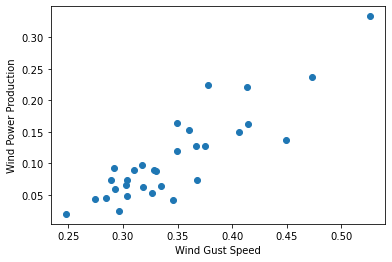

In [37]:
#correlation wind speed and power production in July, 2000.
corr_speed_power, _ = pearsonr(df_July2000_SE3_D.WindGustSpeed, df_July2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_July2000_SE3_D.WindGustSpeed, df_July2000_SE3_D.PowerProduction )
plt.xlabel("Wind Gust Speed")
plt.ylabel("Wind Power Production")

-0.1772816116694948


Text(0, 0.5, 'Wind Power Production')

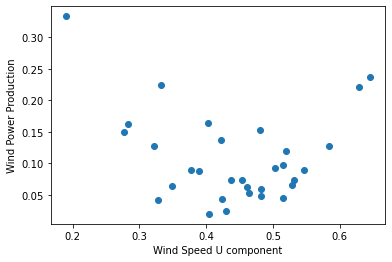

In [38]:
#correlation of wind U component and power production in Septempber, 2000.
corr_speed_power, _ = pearsonr(df_July2000_SE3_D.Wind_U, df_July2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_July2000_SE3_D.Wind_U, df_July2000_SE3_D.PowerProduction )
plt.xlabel("Wind Speed U component")
plt.ylabel("Wind Power Production")

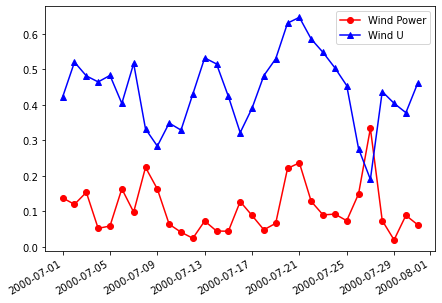

In [39]:
#wind power production vs wind speed V component in Septempber, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_July2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_July2000_SE3_D.Wind_U, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind U'])

-0.022983300201439884


Text(0, 0.5, 'Wind Power Production')

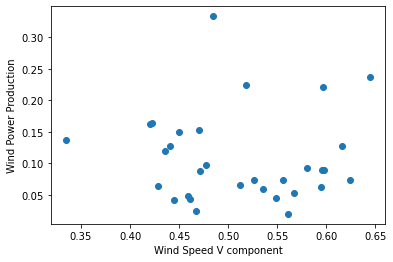

In [40]:
#correlation of wind U component and power production in Septempber, 2000.
corr_speed_power, _ = pearsonr(df_July2000_SE3_D.Wind_V, df_July2000_SE3_D.PowerProduction)
print(corr_speed_power)
plt.scatter(df_July2000_SE3_D.Wind_V, df_July2000_SE3_D.PowerProduction )
plt.xlabel("Wind Speed V component")
plt.ylabel("Wind Power Production")

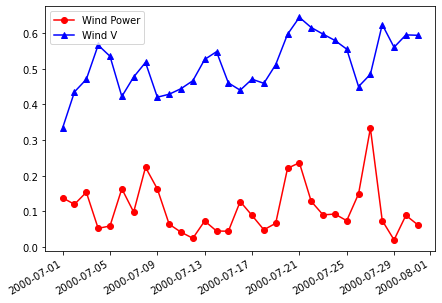

In [41]:
#wind power production vs wind speed V component in September, 2000.
plt.figure(figsize=(7,5))
plt.plot(df_July2000_SE3_D.PowerProduction, 'r', marker='o')
plt.plot(df_July2000_SE3_D.Wind_V, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind V'])

###### In July, correlaton value of wind speed's U and V component with wind power production is negative.

In [42]:
winter_sample = df_SE3_normalized_D.loc['2000-01-01': '2000-03-31']
spring_sample = df_SE3_normalized_D.loc['2000-04-01': '2000-05-31']
summer_sample = df_SE3_normalized_D.loc['2000-06-01': '2000-08-31']
autumn_sample = df_SE3_normalized_D.loc['2000-09-01': '2000-11-30']

Text(0.5, 1.0, 'Winter')

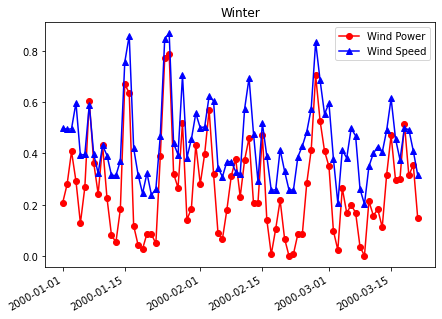

In [43]:
#wind power production vs wind speed V component in winter.
plt.figure(figsize=(7,5))
plt.plot(winter_sample.PowerProduction, 'r', marker='o')
plt.plot(winter_sample.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Winter')

###### I have considered Jan-March as winter. In winter, wind speed reaches to maximum of about 0.8 and so does the power (about 0.8). We can see these months are quite windy as there are many peaks which are about 0.5 or more than 0.5.

Text(0.5, 1.0, 'Spring')

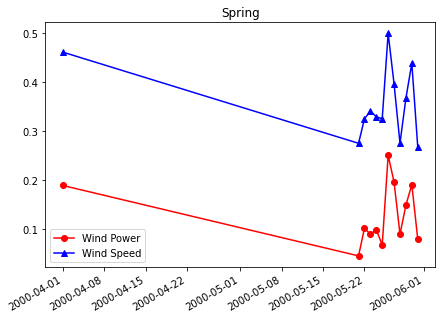

In [44]:
#wind power production vs wind speed V component in winter.
plt.figure(figsize=(7,5))
plt.plot(spring_sample.PowerProduction, 'r', marker='o')
plt.plot(spring_sample.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Spring')

###### I have considered April and May as spring season. We can see that after 1st April, directly there is data on 22nd May, it is because we found many files corrupted during this time period. So, do not have data for these values. 

Text(0.5, 1.0, 'Summer')

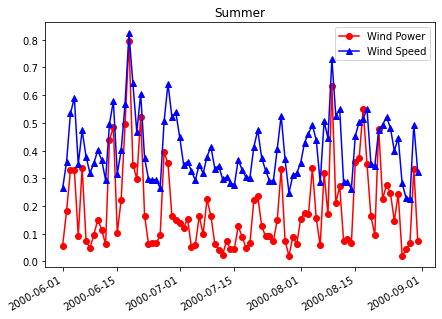

In [45]:
#wind power production vs wind speed V component in summer.
plt.figure(figsize=(7,5))
plt.plot(summer_sample.PowerProduction, 'r', marker='o')
plt.plot(summer_sample.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Summer')

###### I have considered June to August as summer. We can observe that there is many peaks are about 0.5 or less than 0.5. Highest peak is about 0.8.

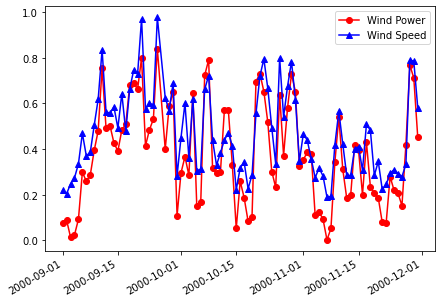

In [46]:
#wind power production vs wind speed V component in autumn.
plt.figure(figsize=(7,5))
plt.plot(autumn_sample.PowerProduction, 'r', marker='o')
plt.plot(autumn_sample.WindGustSpeed, 'b', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])

###### we can see that there are many peaks for both speed and power in autumn about 0.8 or about 0.5. Also there are some peaks less than 0.5. Overall these months seems to be highliy windy and so does the power produced is more. In resample_M, we saw that september month produced the maximum power. Here, we can see that highest peak is between 15 Sep,2000 and 30 Sep,2000.

In [47]:
df_seasons = [winter_sample, spring_sample, summer_sample, autumn_sample]

In [48]:
# speed_list = []
# power_list =[]
# for season in df_seasons:
#     max_index = season['WindGustSpeed'].idxmax()
#     #print(season['WindGustSpeed'].idxmax())
#     print('WindGustSpeed of {}: {}'.format(max_index, season.loc[max_index].WindGustSpeed))
#     print('PowerProduction of {}: {} \n'.format(max_index, season.loc[max_index].PowerProduction))
#     speed_list.append(season.loc[max_index].WindGustSpeed)
#     power_list.append(season.loc[max_index].PowerProduction)

In [49]:
speed_list = []
power_list =[]
for season in df_seasons:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list.append(season_mean_speed)
    power_list.append(season_mean_power)
print(speed_list)
print(power_list)

[0.4451538568569161, 0.3580172764387981, 0.4040980765977232, 0.4711344494728362]
[0.26590325767101536, 0.12808308400262786, 0.18894655236841007, 0.3759563208535025]


In [50]:
seasons = ['winter', 'spring', 'summer', 'autumn']

speed_idx = speed_list.index(max(speed_list))
power_idx = power_list.index(max(power_list))

print('maximum wind speed in {}'.format(seasons[speed_idx]))
print('maximum wind power produced in {}'.format(seasons[power_idx]))

maximum wind speed in autumn
maximum wind power produced in autumn


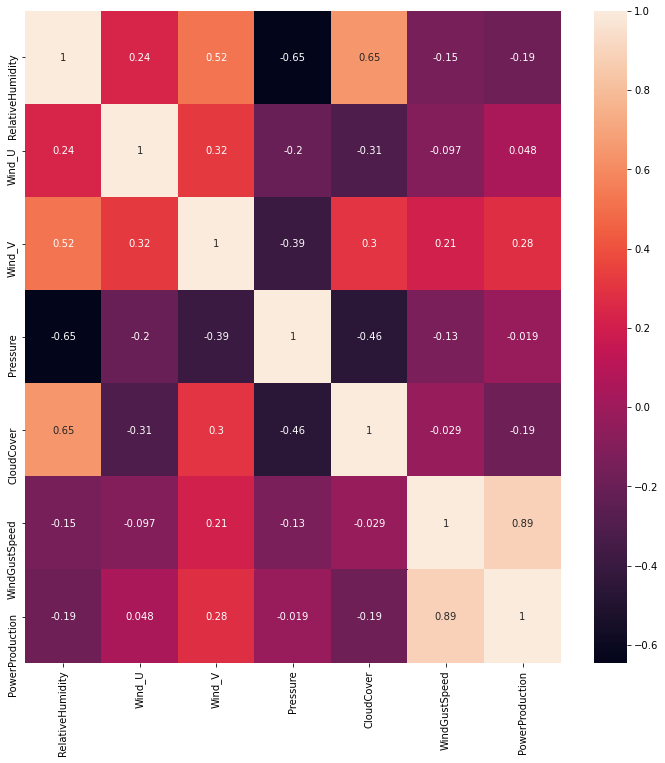

In [51]:
import seaborn as sns
df_small = winter_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

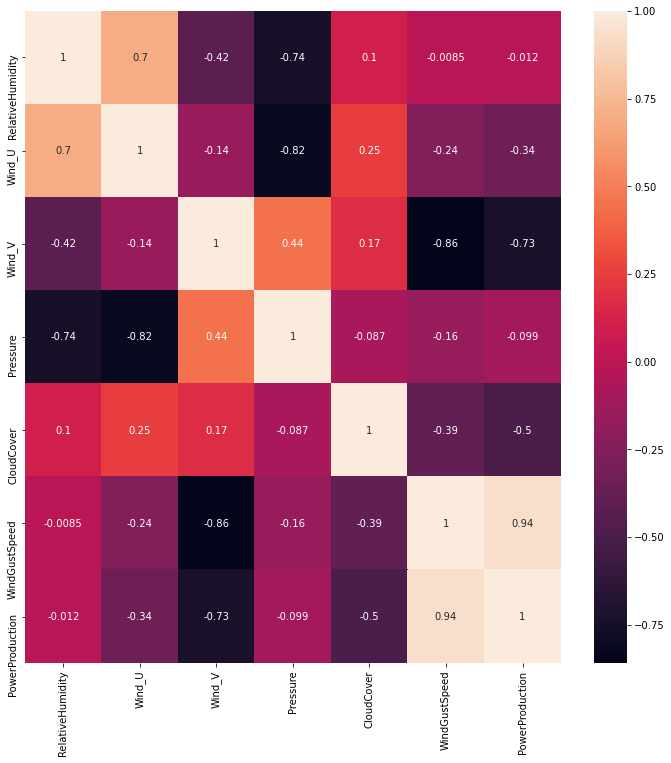

In [52]:
import seaborn as sns
df_small = spring_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

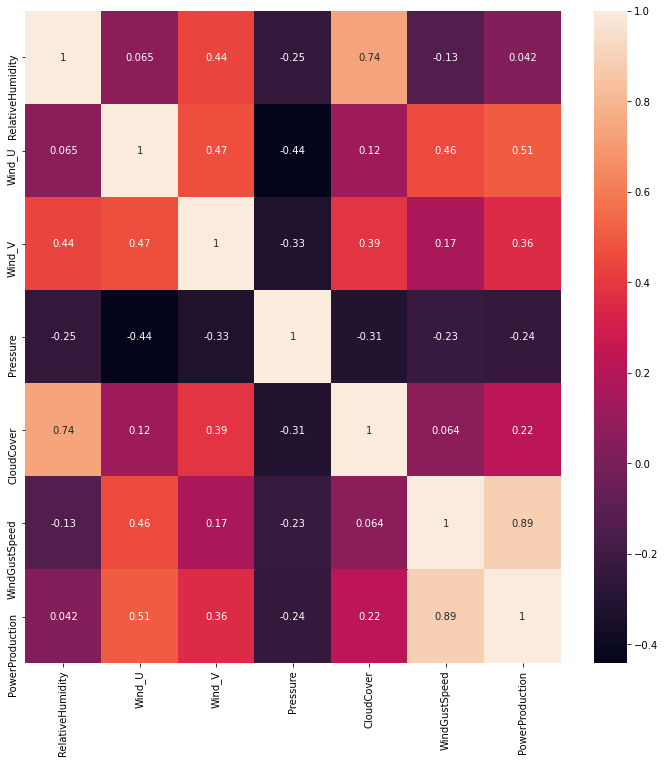

In [53]:
import seaborn as sns
df_small = summer_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

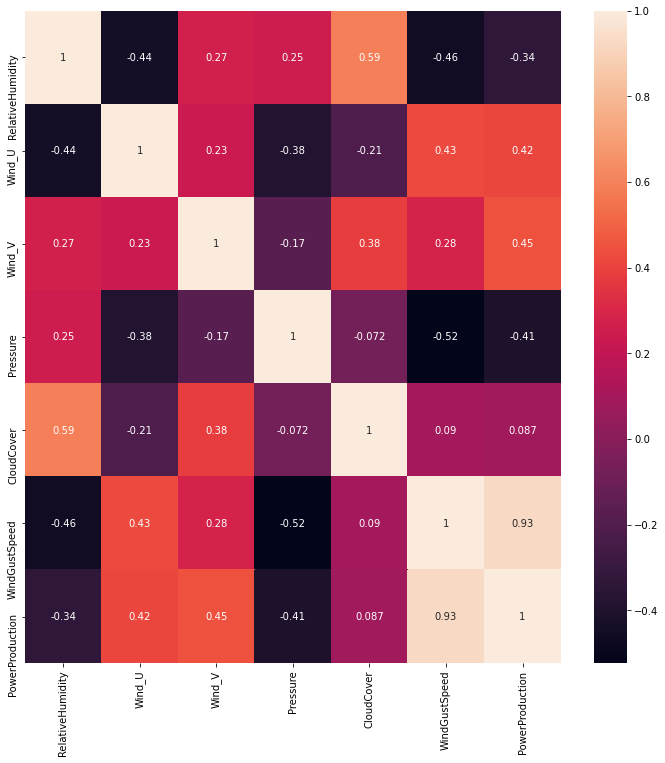

In [54]:
import seaborn as sns
df_small = autumn_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

###### maximum average wind speed and power production in  autumn.  speed and power in autumn:   0.47113 & 0.37595
###### coorelation value of wind speed and power production 0.89-0.94. Maximum in spring. Autumn:0.93
###### average wind speed and power production
'[0.4451538568569161, 0.3580172764387981, 0.4040980765977232, 0.4711344494728362] and 
[0.26590325767101536, 0.12808308400262786, 0.18894655236841007, 0.3759563208535025]'

In [55]:
winter_sample_01 = df_SE3_normalized_D.loc['2001-01-01': '2001-03-31']
spring_sample_01 = df_SE3_normalized_D.loc['2001-04-01': '2001-05-31']
summer_sample_01 = df_SE3_normalized_D.loc['2001-06-01': '2001-08-31']
autumn_sample_01 = df_SE3_normalized_D.loc['2001-09-01': '2001-11-30']

In [56]:
df_seasons_f = [winter_sample, spring_sample, summer_sample, autumn_sample, winter_sample_01, spring_sample_01, summer_sample_01, autumn_sample_01]

In [57]:
speed_list_f = []
power_list_f =[]
wind_u_list_f = []
wind_v_list_f = []
for season in df_seasons_f:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    season_mean_wind_u = season['Wind_U'].mean()
    season_mean_wind_v = season['Wind_V'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list_f.append(season_mean_speed)
    power_list_f.append(season_mean_power)
    wind_u_list_f.append(season_mean_wind_u)
    wind_v_list_f.append(season_mean_wind_v)
print(speed_list_f)
print(power_list_f)

[0.4451538568569161, 0.3580172764387981, 0.4040980765977232, 0.4711344494728362, 0.46649044905618664, 0.41869100288032535, 0.41085422201162985, 0.44139045223004714]
[0.26590325767101536, 0.12808308400262786, 0.18894655236841007, 0.3759563208535025, 0.4140709634862098, 0.27402333423925107, 0.24460327601503606, 0.34098859662475156]


In [58]:
seasons_f = ['Winter-2000', 'Spring-2000', 'Summer-2000', 'Autumn-2000', 'Winter-2001', 'Spring-2001', 'Summer-2001', 'Autumn-2001']

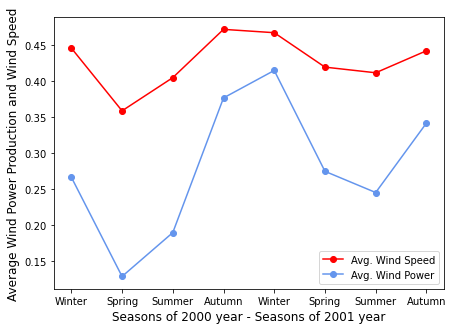

In [66]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,speed_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'cornflowerblue', marker='o')

plt.ylabel('Average Wind Power Production and Wind Speed', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind Speed over SE3')
plt.legend(['Avg. Wind Speed','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_SE3.png", transparent=True)

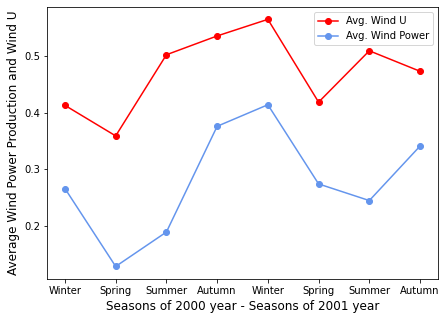

In [64]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_u_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'cornflowerblue', marker='o')
plt.ylabel('Average Wind Power Production and Wind U', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind U Component over SE3')
plt.legend(['Avg. Wind U', 'Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_U_SE3.png", transparent=True)

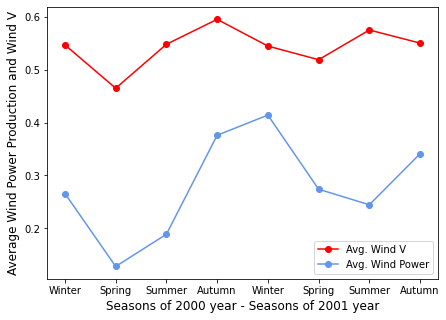

In [65]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_v_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'cornflowerblue', marker='o')
plt.ylabel('Average Wind Power Production and Wind V', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind V Component over SE3')
plt.legend(['Avg. Wind V','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_V_SE3.png", transparent=True)